In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install xlrd

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
awsebcli 3.15.3 has requirement requests<2.21,>=2.20.1, but you'll have requests 2.19.1 which is incompatible.
awsebcli 3.15.3 has requirement six<1.12.0,>=1.11.0, but you'll have six 1.13.0 which is incompatible.
requests 2.19.1 has requirement urllib3<1.24,>=1.21.1, but you'll have urllib3 1.24.3 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
df = pd.read_excel("Canada.xlsx",
                  sheet_name = "Canada by Citizenship",
                  skiprows=range(20),
                  skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df.shape

(195, 43)

In [5]:
df.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)

In [6]:
df.rename(columns={'OdName':'Countries','AreaName':'Continent','RegName':'Region'},inplace=True)
df.head()

,Countries,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
df.set_index("Countries",inplace=True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Countries,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [8]:
df['Total'] = df.sum(axis=1)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Countries,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [9]:
df.columns.values

array(['Continent', 'Region', 'DevName', 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 'Total'], dtype=object)

In [10]:
df.columns = list(map(str, [col for col in df]))

In [11]:
df.columns.values

array(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', 'Total'],
      dtype=object)

In [12]:
df.shape

(195, 38)

In [13]:
years = list(map(str, range(1980,2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [39]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('default')

In [40]:
df.sort_values(['Total'],ascending=False,inplace=True)

In [18]:
top5 = df[years].T
top5

Countries,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,Poland,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,8880,5123,22045,6051,978,9378,1172,185,1011,863,...,0,0,0,0,0,1,0,0,0,0
1981,8670,6682,24796,5921,972,10030,1429,371,1456,2930,...,0,0,0,1,1,0,0,0,0,0
1982,8147,3308,20620,5249,1201,9074,1822,290,1572,5881,...,0,0,0,0,0,0,0,0,0,0
1983,7338,1863,10015,4562,900,7100,1592,197,1081,4546,...,1,0,0,0,0,0,0,0,0,0
1984,5704,1527,10170,3801,668,6661,1977,1086,847,3588,...,0,0,0,1,0,0,0,0,0,0
1985,4211,1816,9564,3150,514,6543,1648,845,962,2819,...,0,0,0,0,0,0,0,0,0,0
1986,7150,1960,9470,4166,691,7074,1794,1838,1208,4808,...,0,0,0,0,0,1,0,0,0,0
1987,10189,2643,21337,7360,1072,7705,2989,4447,2338,6931,...,0,0,0,0,1,0,0,0,0,0
1988,11522,2758,27359,8639,1334,6469,3273,2779,2805,9211,...,0,0,0,1,0,0,0,0,0,0
1989,10343,4323,23795,11865,2261,6790,3781,2758,2979,16025,...,2,0,0,0,1,0,0,0,0,0


In [41]:
df_top = df[years].head().T
df_top

Countries,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


In [42]:
df_top.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'},inplace=True)
df_top.head()

Countries,India,China,UK,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Text(0,0.5,'Number of Immigrants')

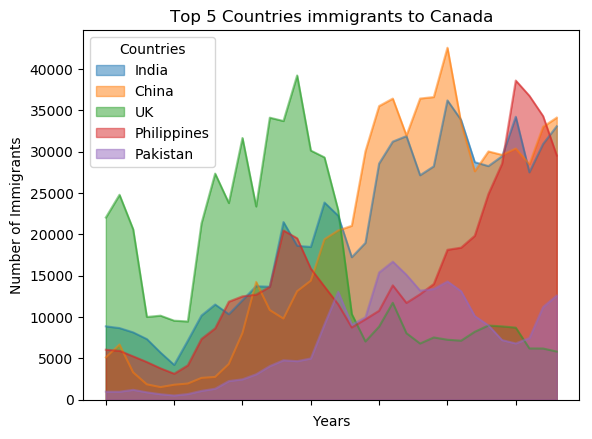

In [43]:
df_top.plot(kind='area',stacked=False)
plt.title('Top 5 Countries immigrants to Canada')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
#years are not showing, since they are in integers lets convert to int


In [48]:
df_top.index = list(map(int, years))
df_top.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

Text(0,0.5,'Number of Immigrants')

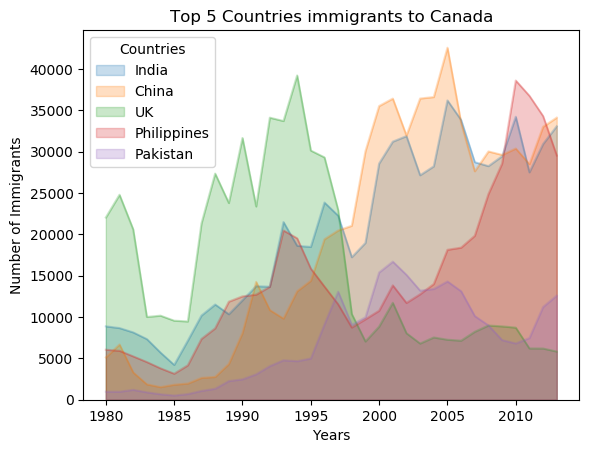

In [52]:
df_top.plot(kind='area',stacked=False,alpha=0.25)
plt.title('Top 5 Countries immigrants to Canada')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

In [57]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Countries,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


Let's try histograms next.

In [56]:
df['2013'].head()

Countries
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [61]:
np.histogram(df['2013'])

(array([178,  11,   1,   2,   0,   0,   0,   0,   1,   2], dtype=int64),
 array([    0. ,  3412.9,  6825.8, 10238.7, 13651.6, 17064.5, 20477.4,
        23890.3, 27303.2, 30716.1, 34129. ]))

Text(0.5,0,'Number of Immigrants')

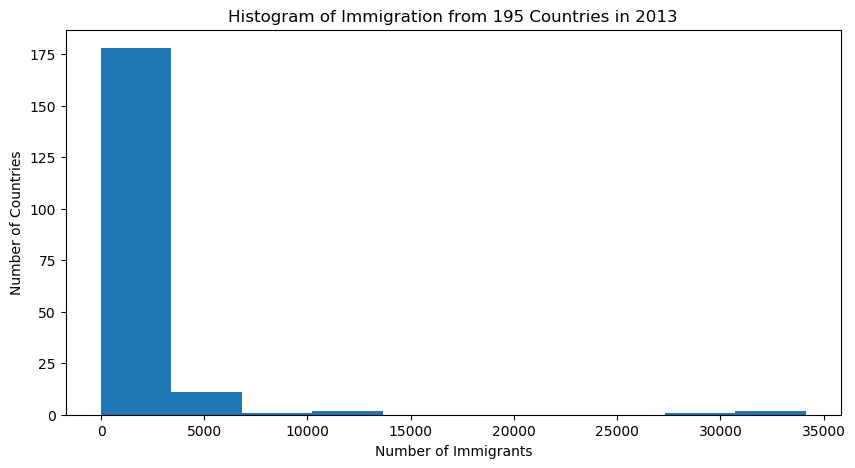

In [64]:
df['2013'].plot(kind='hist',figsize=(10,5))
#df['2013'].plot.hist()
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

Text(0.5,0,'Number of Immigrants')

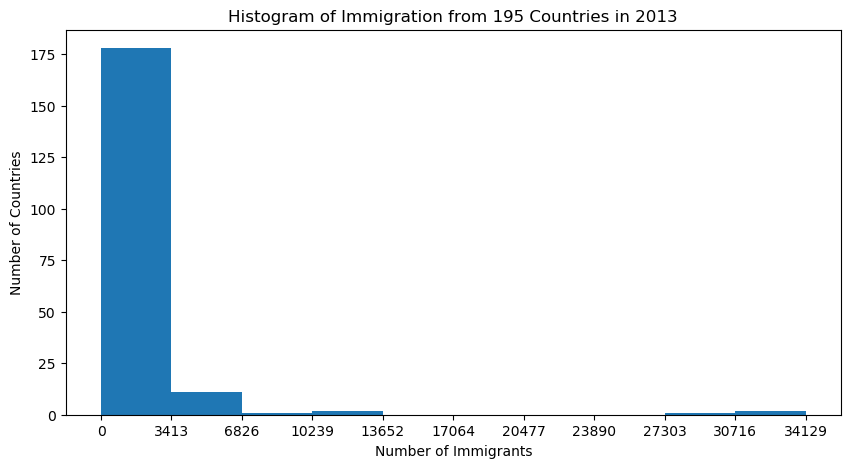

In [66]:
df['2013'].plot(kind='hist',figsize=(10,5),xticks= np.histogram(df['2013'])[1])
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

In [83]:
df.loc[['Denmark','Sweden','Norway'],years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Countries,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59


In [93]:
years_int = list(map(int, years))
print(years_int)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


In [96]:
df.loc[['Denmark','Sweden','Norway'],years].T.head()

Countries,Denmark,Sweden,Norway
1980,272,281,116
1981,293,308,77
1982,299,222,106
1983,106,176,51
1984,93,128,31


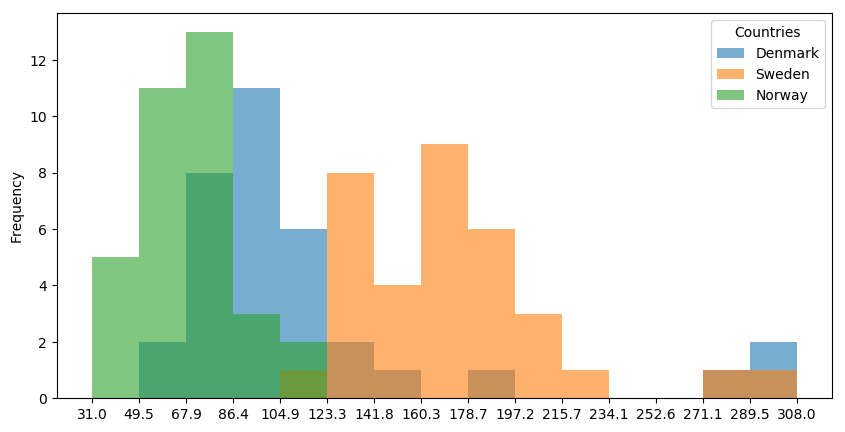

In [111]:
df_temp = df.loc[['Denmark','Sweden','Norway'],years].T
df_temp.plot.hist(xticks = np.histogram(df_temp,15)[1],alpha=0.6,figsize=(10,5),bins=15)

Let's now go on to bar plots
Vertical bar graphs are particuarly useful in analyzing time series data. 

Text(0.5,1,'Icelandic Immigrants to Canada from 1980 to 2013')

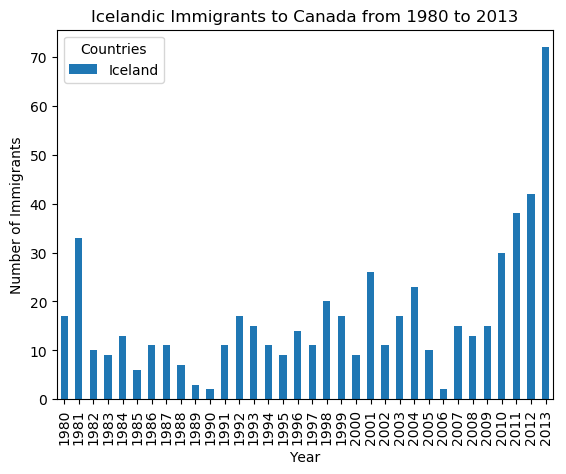

In [123]:
df.loc[['Iceland'],years].T.plot.bar()
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

In [125]:
df_top15 = df.sort_values(by=['Total'],ascending=False).head(15)
df_top15 = df_top15['Total']
df_top15.rename({'United Kingdom of Great Britain and Northern Ireland':'UK'},axis=0,inplace=True)
df_top15.head()

Countries
India          691904
China          659962
UK             551500
Philippines    511391
Pakistan       241600
Name: Total, dtype: int64

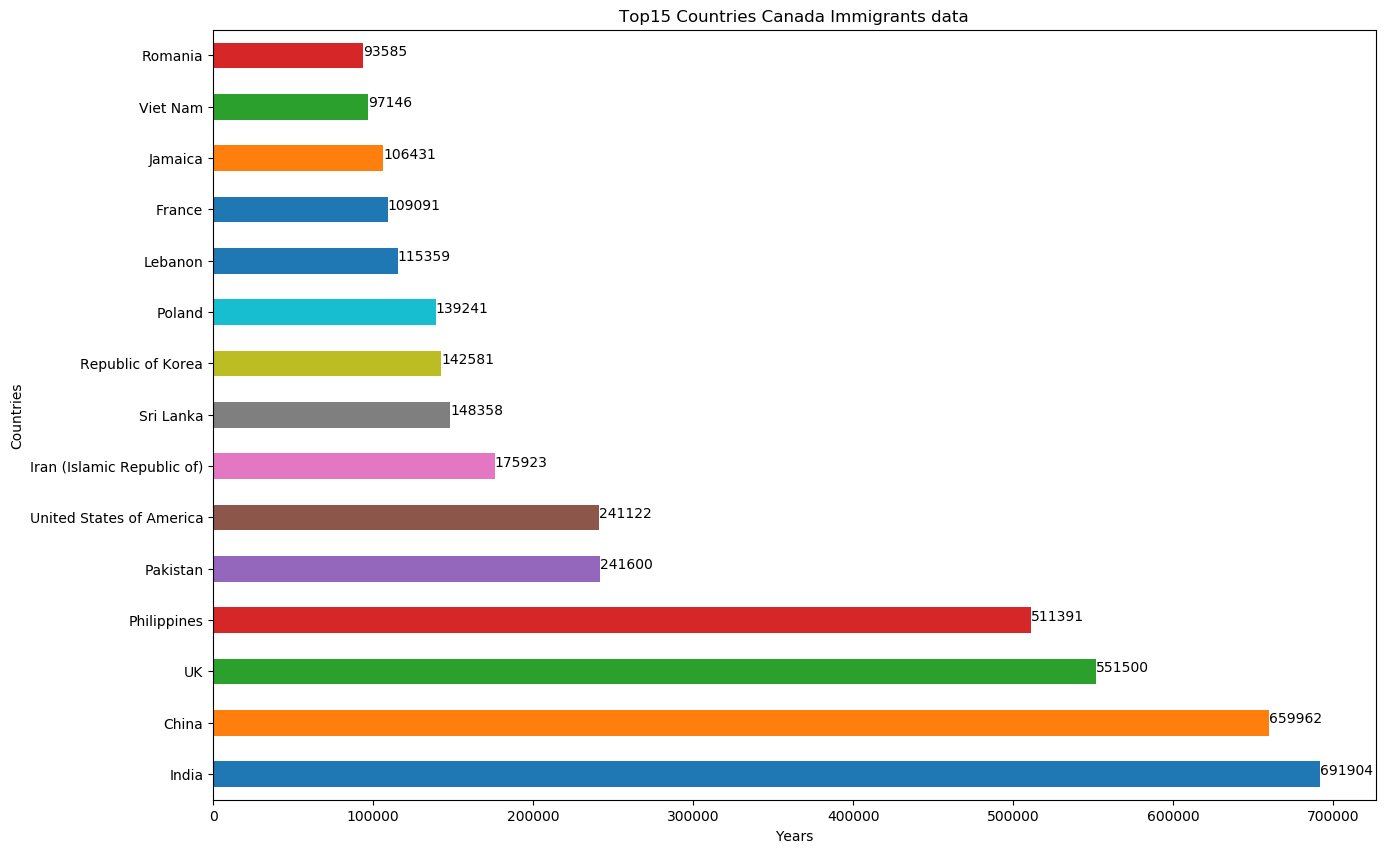

In [126]:
df_top15.plot(kind='barh',figsize=(15,10))
plt.title('Top15 Countries Canada Immigrants data')
plt.xlabel('Years')
plt.ylabel('Countries')
crow = df_top15.shape
for id,row in enumerate(df_top15):
     plt.annotate(str(row),
                xy = (row,id))
